In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

In [61]:
income_df = pd.read_csv('/home/student/IngajiDemo/dataset.csv')

In [36]:
# print(income_df.isna().sum())

In [62]:
income_df['Household_Head_Occupation'] = income_df.groupby('Household_Head_Highest_Grade_Completed')['Household_Head_Occupation'].transform(lambda x: x.ffill().bfill())

In [46]:
# print(income_df.isna().sum())

In [63]:
income_df['Household_Head_Class_of_Worker'] = income_df.groupby('Household_Head_Occupation')['Household_Head_Class_of_Worker'].transform(lambda x: x.ffill().bfill())

In [64]:
income_df['Total_Number_of_Family_members'] = income_df.groupby('Type_of_Household')['Total_Number_of_Family_members'].transform(lambda x: x.ffill().bfill())

In [49]:
# print(income_df.isna().sum())

In [65]:
income_df['Toilet_Facilities'] = income_df.groupby('Total_Number_of_Family_members')['Toilet_Facilities'].transform(lambda x: x.ffill().bfill())

## ## Column Description
1. Total_Household_Income: Total income of the household, which is crucial for assessing repayment capacity.
2. Region: Geographical location, which may influence income levels and access to resources.
3. Total_Food_Expenditure: Indicates spending habits and financial management skills, important for understanding financial stability.
4. Main_Source_of_Income: Identifies primary income source, affecting economic stability and predictability of income.
5. Agricultural_Household_Indicator: Whether the household is primarily engaged in agriculture, relevant for understanding risks associated with agricultural loans.
6. Bread_and_Cereals_Expenditure: Spending on staples; high expenditure may indicate financial strain or food security issues.
7. Total_Rice_Expenditure: Specific food expenditure, important in rice-dependent regions for assessing basic needs coverage.
8. Meat_Expenditure: Indicates dietary habits and potential disposable income.
9. Total_Fish_and_Marine_Products_Expenditure: Reflects dietary diversity and potential economic stability.
10. Fruit_Expenditure: Another measure of dietary habits, can indicate health and economic conditions.
11. Vegetables_Expenditure: Similar to fruit expenditure, reflecting spending habits and nutritional status.
12. Restaurant_and_Hotels_Expenditure: Indicates discretionary spending; lower spending could signify economic hardship.
13. Alcoholic_Beverages_Expenditure: Spending on alcohol may reflect lifestyle choices affecting financial management.
14. Tobacco_Expenditure: Spending on tobacco can indicate financial priorities and health-related costs.
15. Clothing, Footwear, and Other Wear Expenditure: A measure of consumer spending reflecting lifestyle and disposable income.
16. Housing_and_Water_Expenditure: Vital for understanding housing stability, which impacts overall creditworthiness.
17. Imputed_House_Rental_Value: Represents potential income from owning property, relevant for asset valuation.
18. Medical_Care_Expenditure: Indicates financial burden from healthcare, affecting available resources for loan repayment.
19. Transportation_Expenditure: Reflects mobility and potential for economic activity, impacting income generation.
20. Communication_Expenditure: Vital for assessing connectivity and access to information, which can affect business opportunities.
21. Education_Expenditure: Higher spending may correlate with better future income potential, influencing loan repayment prospects.
22. Miscellaneous_Goods_and_Services_Expenditure: Other expenditures can indicate overall financial health.
23. Special_Occasions_Expenditure: Reflects cultural practices and potential financial stress during celebrations.
24. Crop_Farming_and_Gardening_expenses: Directly relevant for assessing investment in agriculture, crucial for loan evaluation.
25. Total_Income_from_Entrepreneurial_Activities: Additional income source, important for total income assessment and repayment capacity.
26. Household_Head_Sex: Gender may influence household income dynamics and access to credit.
27. Household_Head_Age: Age may correlate with experience and financial stability.
28. Household_Head_Marital_Status: Marital status can affect household stability and income generation.
29. Household_Head_Highest_Grade_Completed: Education level can influence income potential and loan eligibility.
30. Household_Head_Job_or_Business_Indicator: Employment status directly impacts financial stability.
31. Household_Head_Occupation: Specific job type can indicate income levels and financial security.
32. Household_Head_Class_of_Worker: Employment classification affects income stability.
33. Type_of_Household: Structure of the household can impact financial dynamics and resource allocation.
34. Total_Number_of_Family_members: Family size can affect income distribution and financial burden.
35. Members_with_age_less_than_5_year_old: Younger dependents can indicate higher household expenses.
36. Members_with_age_5_-_17_years_old: Children in this age range may reflect education-related expenditures.
37. Total_number_of_family_members_employed: Employment levels can provide insights into household income stability.
38. Type_of_Building/House: Type of dwelling can reflect economic status and potential asset value.
39. Type_of_Roof: Indicates quality of housing, which can correlate with wealth.
40. Type_of_Walls: Similar to roof type, reflects household stability and asset quality.
41. House_Floor_Area: Larger areas may indicate better economic conditions and asset stability.
42. House_Age: Older houses may require more maintenance, impacting financial health.
43. Number_of_bedrooms: Indicates household size and living conditions.
44. Tenure_Status: Owning vs. renting impacts financial stability and asset value.
45. Toilet_Facilities: Access to sanitation can reflect overall living standards.
46. Electricity: Access to electricity indicates economic development and potential for productivity.
47. Main_Source_of_Water_Supply: Water access impacts living conditions and agricultural viability.
48. Number_of_Television: Ownership may reflect disposable income.
49. Number_of_CD/VCD/DVD: Similar to television ownership, reflects spending on entertainment.
50. Number_of_Component/Stereo_set: Indicates lifestyle and economic status.
52. Number_of_Washing_Machine: Ownership reflects financial capability and lifestyle
53. Number_of_Airconditioner: Indicates economic status and comfort level.
54. Number_of_Car,_Jeep,_Van: Vehicle ownership signifies economic capability and mobility.
55. Number_of_Landline/wireless_telephones: Communication access affects connectivity and business potential.
56. Number_of_Cellular_phone: Smartphone ownership reflects economic status and communication access.
57. Number_of_Personal_Computer: Indicates technological access, affecting education and economic opportunities.
58. Number_of_Stove_with_Oven/Gas_Range: Kitchen appliances can indicate household economic status.
59. Number_of_Motorized_Banca: Relevant for rural economies; reflects livelihood and mobility.
60. Number_of_Motorcycle/Tricycle: Transportation availability can impact access to markets and services.

In [66]:
income_df.rename(columns={'Total_Food_Expenditure': 'total_food_expenditure', 
                          'Bread_and_Cereals_Expenditure': 'bread_and_cereals_expenditure',
                          'Total_Rice_Expenditure': 'total_rice_expenditure',
                          'Meat_Expenditure': 'meat_expenditure',
                          'Total_Fish_and__marine_products_Expenditure': 'total_fish_and__marine_products_expenditure',
                          'Fruit_Expenditure': 'fruit_expenditure',
                          'Vegetables_Expenditure': 'vegetables_expenditure',
                          'Restaurant_and_hotels_Expenditure': 'restaurant_and_hotels_expenditure',
                          'Alcoholic_Beverages_Expenditure': 'alcoholic_beverages_expenditure',
                          'Tobacco_Expenditure': 'tobacco_expenditure',
                          'Clothing,_Footwear_and_Other_Wear_Expenditure': 'clothing_footwear_and_other_wear_expenditure',
                          'Housing_and_water_Expenditure': 'housing_and_water_expenditure',
                          'Medical_Care_Expenditure': 'medical_care_expenditure',
                          'Transportation_Expenditure': 'transportation_expenditure',
                          'Communication_Expenditure': 'communication_expenditure',
                          'Education_Expenditure': 'education_expenditure',
                          'Miscellaneous_Goods_and_Services_Expenditure': 'miscellaneous_goods_and_services_expenditure',
                          'Special_Occasions_Expenditure': 'special_occasions_expenditure',
                          'Main_Source_of_Income': 'main_source_of_income',
                          'Household_Head_Highest_Grade_Completed': 'household_head_highest_grade_completed',
                          'Household_Head_Occupation': 'household_head_occupation',
                          'Tenure_Status': 'tenure_status',
                          'Type_of_Building/House': 'type_of_building/house',
                          'Type_of_Household': 'type_of_household',
                          'Household_Head_Class_of_Worker': 'household_head_class_of_worker',
                          'Total_Household_Income': 'total_household_income',
                          'Total_Expenditures': 'total_expenditures',
                          'Crop_Farming_and_Gardening_expenses': 'crop_farming_and_gardening_expenses'
                         }, inplace=True)

In [67]:
# This are filtered columns for farmers occupations only 
farmer_occupations = [
    'Farmers', 'Agricultural laborers', 'Rice farmers', 'Crop Farming and Gardening',
    'Livestock farmers', 'Agricultural technicians', 'Farmhands and laborers', 'Hog raising farmers'
    ]

In [68]:
farmers_df = income_df[income_df['household_head_occupation'].isin(farmer_occupations)]

### This list contains the names of various expenditure columns related to household spending. This list will be used to calculate total expenditures.

In [18]:
# farmers_df.head(20)

In [69]:
expenditure_columns = [
    'total_food_expenditure', 'bread_and_cereals_expenditure', 'total_rice_expenditure',
    'meat_expenditure', 'total_fish_and__marine_products_expenditure', 'fruit_expenditure',
    'vegetables_expenditure', 'restaurant_and_hotels_expenditure', 'alcoholic_beverages_expenditure',
    'tobacco_expenditure', 'clothing_footwear_and_other_wear_expenditure',
    'housing_and_water_expenditure', 'medical_care_expenditure', 'transportation_expenditure',
    'communication_expenditure', 'education_expenditure', 'miscellaneous_goods_and_services_expenditure',
    'special_occasions_expenditure', 'crop_farming_and_gardening_expenses'
]

In [70]:
# Create a copy of the filtered DataFrame
farmers_df = income_df[income_df['household_head_occupation'].isin(farmer_occupations)].copy()

# Calculate Total Expenditures
farmers_df['total_expenditures'] = farmers_df[expenditure_columns].sum(axis=1)

# Calculate Remaining Income
farmers_df['remaining_income'] = farmers_df['total_household_income'] - farmers_df['total_expenditures']
# print(farmers_df)

# assign_credit_score_and_loan_range
This function assigns a credit score and a loan range based on the Remaining_Income. The logic is:
If the remaining income is greater than 50,000, the score is 750 with a loan range of "50,000 - 100,000".
Different thresholds assign lower scores and ranges for lower income levels.

In [71]:
# Define function to assign credit score and loan range based on remaining income
def assign_credit_score_and_loan_range(row):
    if row['remaining_income'] > 50000:
        return 750, '50,000 - 100,000'
    elif row['remaining_income'] > 20000:
        return 600, '20,000 - 50,000'
    elif row['remaining_income'] > 5000:
        return 500, '5,000 - 20,000'
    else:
        return 400, '1,000 - 5,000'

In [72]:
categorical_columns=[
    'main_source_of_income', 'household_head_highest_grade_completed', 'household_head_occupation', 'tenure_status',
    'type_of_building/house', 'type_of_household', 'household_head_class_of_worker'
]

numerical_columns = [
    'total_household_income', 'total_expenditures', 'remaining_income'
]

In [73]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns
encoded_cats = encoder.fit_transform(farmers_df[categorical_columns])

In [74]:
# Create DataFrame from encoded categorical features
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded categorical features with the numerical features
data_encoded = pd.concat([farmers_df[numerical_columns].reset_index(drop=True), encoded_cats_df], axis=1)
# print(data_encoded)
# display(data_encoded)
maxValues = data_encoded.min()
# data_encoded.head(20)

In [75]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model
kmeans.fit(numerical_columns)

# Use .predict to assign clusters
data_encoded['Cluster'] = kmeans.predict(data_encoded)

# Print the updated DataFrame with clusters
# display(data_encoded)

ValueError: could not convert string to float: 'total_household_income'

In [76]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model
kmeans.fit(data_encoded)

# Use .predict to assign clusters
data_encoded['Cluster'] = kmeans.predict(data_encoded)

# Print the updated DataFrame with clusters
# display(data_encoded)

In [77]:
# Compute mean values for each cluster
# Counting all the values in each cluster on every column and figuring out the average size
cluster_summary = data_encoded.groupby('Cluster').mean()
print("Cluster Summary:")
# print(cluster_summary)

Cluster Summary:


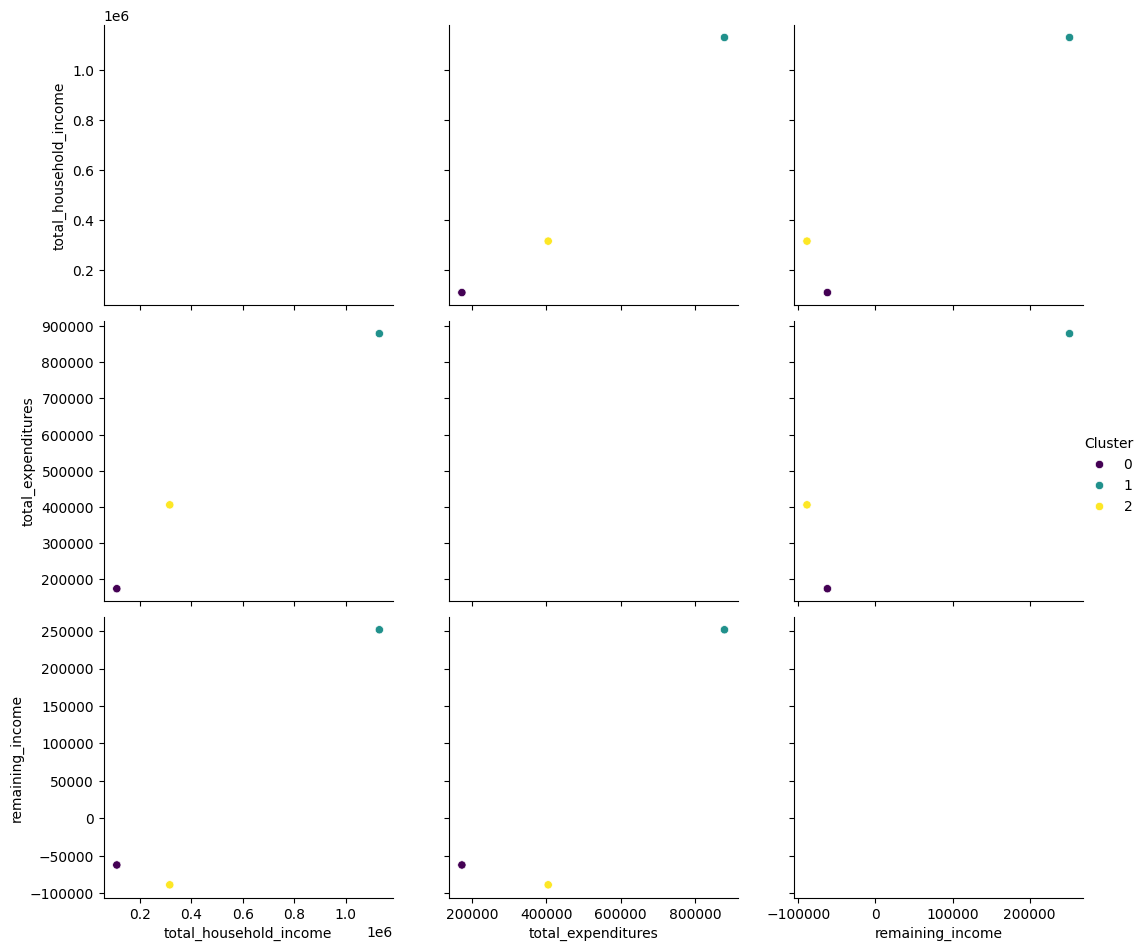

In [78]:
# Visualizing the clusters
features = ['total_household_income', 'total_expenditures', 'remaining_income']
cluster_summary['Cluster'] = cluster_summary.index
cluster_summary_reset = cluster_summary.reset_index(drop=True)

pairplot = sns.pairplot(cluster_summary_reset, vars=features, hue='Cluster', palette='viridis')
pairplot.fig.set_size_inches(12, 10)
plt.subplots_adjust(top=0.95, right=0.95)
plt.show()

In [ ]:
# Here, I have initialized the OneHotEncoder and apply it to the categorical columns to 
# convert them into a numerical format suitable for analysis through feature engineering. 
# The sparse_output=False option ensures the output is a dense array.

In [19]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns
encoded_cats = encoder.fit_transform(farmers_df[categorical_columns])

In [20]:
# Create DataFrame from encoded categorical features
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded categorical features with the numerical features
data_encoded = pd.concat([farmers_df[numerical_columns].reset_index(drop=True), encoded_cats_df], axis=1)
# print(data_encoded)
# display(data_encoded)
maxValues = data_encoded.min()
# print(maxValues)

In [21]:
# Standardize numerical columns
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
# data_encoded has the one-hot encoded categorical values + numerical columns
# print(data_encoded)

# Results explanation using examples
A value of -0.484775 means the original data point is about 0.48 standard deviations below the mean.
A value of 2.861345 means it’s 2.86 standard deviations above the mean.
The value like 2.861345 means it’s much taller than average. The income is compared to the average income in the dataset. It shows that this income is significantly higher than most others.- This helps in identifying outliers—people with incomes that are much higher (or lower) than most.

In [22]:
# Check the mean and std after scaling
scaled_means = data_encoded[numerical_columns].mean()
scaled_stds = data_encoded[numerical_columns].std()

print("Means after scaling:\n", scaled_means)
print("\nStandard deviations after scaling:\n", scaled_stds)

Means after scaling:
 total_household_income    4.327081e-17
total_expenditures        0.000000e+00
remaining_income          1.262065e-17
dtype: float64

Standard deviations after scaling:
 total_household_income    1.000063
total_expenditures        1.000063
remaining_income          1.000063
dtype: float64


In [98]:
# KMeans clustering is applied to the standardized data with a specified number of clusters (3). 
# The resulting cluster assignments are added to the DataFrame as a new column named Cluster.

In [54]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model
kmeans.fit(data_encoded)

# Use .predict to assign clusters
data_encoded['Cluster'] = kmeans.predict(data_encoded)

# Print the updated DataFrame with clusters
# display(data_encoded)

# Cluster explanation
Cluster 0: People who have less money and don’t save much.
Cluster 1: People who have lots of money and can spend freely.
Cluster 2: People who have some money and save a little.

In [55]:
# Compute mean values for each cluster
# Counting all the values in each cluster on every column and figuring out their average size
cluster_summary = data_encoded.groupby('Cluster').mean()
# print("Cluster Summary:")
# print(cluster_summary)

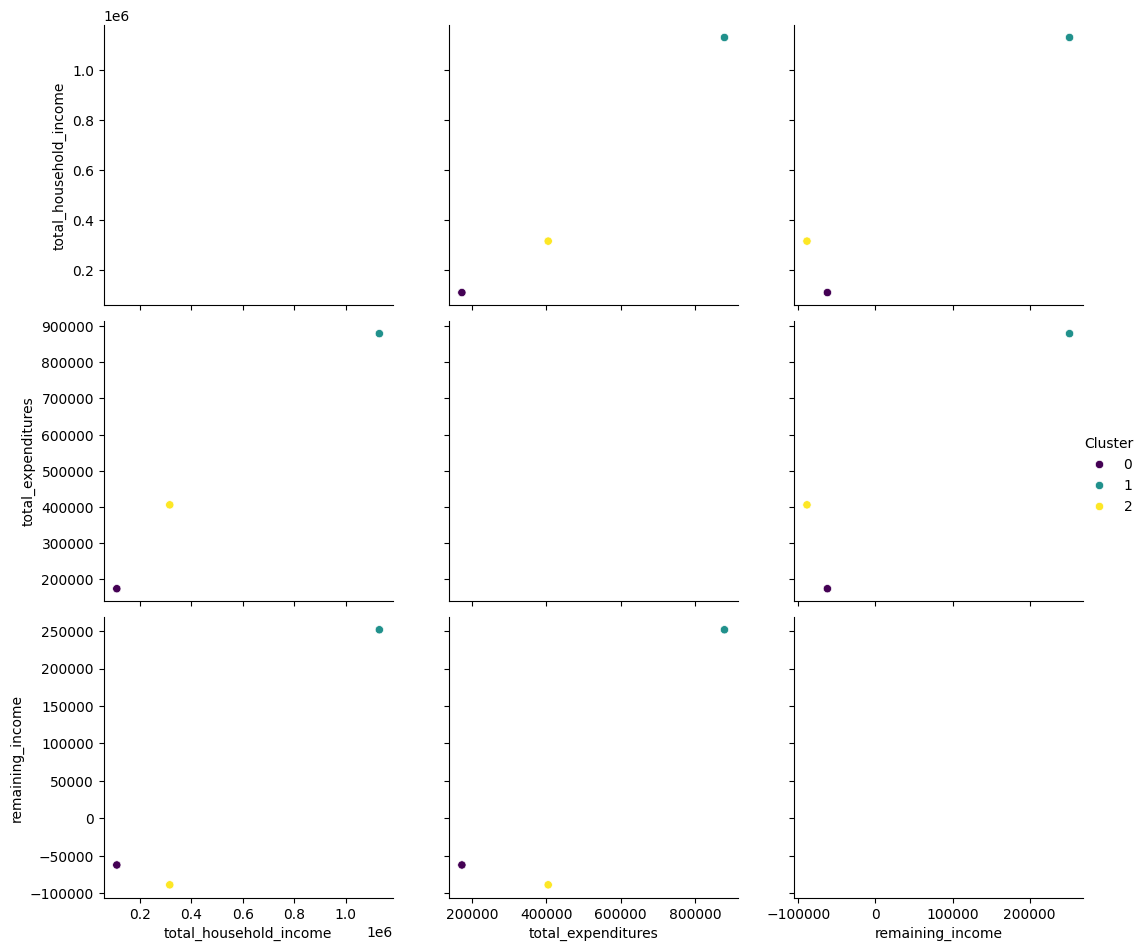

In [56]:
# Visualizing the clusters
features = ['total_household_income', 'total_expenditures', 'remaining_income']
cluster_summary['Cluster'] = cluster_summary.index
cluster_summary_reset = cluster_summary.reset_index(drop=True)

pairplot = sns.pa# Compute mean values for each cluster
# Counting all the values in each cluster on every column and figuring out their average size
cluster_summary = data_encoded.groupby('Cluster').mean()
# print("Cluster Summary:")
# print(cluster_summary)irplot(cluster_summary_reset, vars=features, hue='Cluster', palette='viridis')
pairplot.fig.set_size_inches(12, 10)
plt.subplots_adjust(top=0.95, right=0.95)
plt.show()